### 1. Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

### 2. Reading Data   
>Data Load: Load banglore home prices into a dataframe

We will use pandas read_csv function to read the data in csv file.

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### 3. Data Preprcessing
Data preprocessing is a data mining technique that involves transforming raw data into an understandable format.

In [3]:
df1.shape

(13320, 9)

In [4]:
# taking the 'area_type' column as a group and counting its values
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

```groupby()``` function is used to split the data into groups based on some criteria and ```agg()``` function abbreviation of aggregate is used to define what we want to do with the grouped data.

In [5]:
df2 = df1.drop(['area_type','society','balcony','availability'], axis='columns')     # dropping useless columns
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()     # finding total empty values in each column

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()    # dropping 'NA' values
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

In [9]:
# checking unique values in size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# getting the number of bedrooms from size column
df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\NIKUL\anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Finding rows with extraordinary values!😅 (Outliers)

In [14]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
#   '''
#     Function to convert values into float dtype.
#     '''
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
# finding values those not got converted
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


So from the above shown dataset we can see that the unusual ranges, then some cases in which the values are Sq. Meter and 4125 Perch , and this is very typical problem in datascience where the incoming data is not in the form, unstructured ,  contains outliers and data error so the most of the time is send into data cleaning...

In [17]:
'''
    Function to convert those unusual format of data
'''
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) /2 
    try: 
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num('2100 - 2850')    # usage of the function 

2475.0

In [19]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.loc[30]           # we can use both .loc or .iloc as both act same for integers
# loc function is used to see data row-wise

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [20]:
df5 = df4.copy()
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
# Now we are creating price per sqft column and introducting a new feature which is used for outlier detection and feature engineering
# making a new column in the dataframe named `price_per_sqft`
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [23]:
# location is the categorical feature as it is a category as text data and if there are too many locations then it can create a problem

len(df5.location.unique())

1304

So the number of locations are more and this can cause dimensionally curve or dimensionally problems . So to surpass the problem, there are many methods available using which we can perform reduction in dimensions...

So let's try to concentrate on other category, locations with one or two data point.

In [24]:
df5.location = df5.location.apply(lambda x : x.strip())  # strip is used to remove the white spaces around the data points
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)   # sorting the location column in descending order
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [25]:
len(location_stats[location_stats <= 10])  # totaling the minor locations

1052

In [26]:
location_stats_less_than_10 = location_stats[location_stats <= 10]     # changing minor locations into `other`
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [27]:
len(df5.location.unique())

1293

In [28]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [29]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### `Outlier Removal`

Now let's check for Outlier detection and then removal outliers. 

So OUTLIERS are the data points that are data errors or extreme variation in the dataset, although they are valid but it is good to remove the outliers as they can create any issues later on... 

So the techniques that are used for the removing the outliers are Standard Deviation Method , Interquartile Range Method , Automatic Outlier Detection or any domain knowledge ...

NOTE that one of the things in the realistic domain is that when we have  2 BHK apartment then we cann't have a 500 square foot as total_size ... it should be like 1000 sqft for 2 BHK. 

So we have to remove the outliers that are having square foot value of the bedrooms less than some threshold value .

So here is a short tutorial for [Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)


In [30]:
df5[df5.total_sqft/ df5.bhk < 300].head()    # checking for outliners; like a house with 1407 sq. area can't have 6 bedrooms

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


Let's say the typical value for the threshold is 300

In [31]:
df5.shape

(13246, 7)

In [32]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 7)

### 4. Data Cleaning
In this section, we will find outliers and try to remove them.

In [33]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Now we will have a function through which we can compute the standard deviation so that we can filter out the values that are belong the normal standard deviation in the price_per_sqft column. 

Why to remove this values ? So, there are some values that are having low price per location and some with high price but there are values that are belong this high and low values so one needs to remove this values otherwise there is problems that might occur in the data analysis.

In [34]:
'''
    Function to clear stuff (outliers) in the price_per_sqft(pps) column so that we don't live in a hypothetical dataset. 😄
'''
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)           # calculating mean
        st = np.std(subdf.price_per_sqft)               # calculating standard deviation
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]      # so anything below m-st and anything above m + st is stored in the reduced _df
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [35]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [36]:
# Function that will help us to visualize the data of the different locations
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+' , color = 'green', label = '3 BHK', s= 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location, color = 'y',size = 14)
    plt.legend()

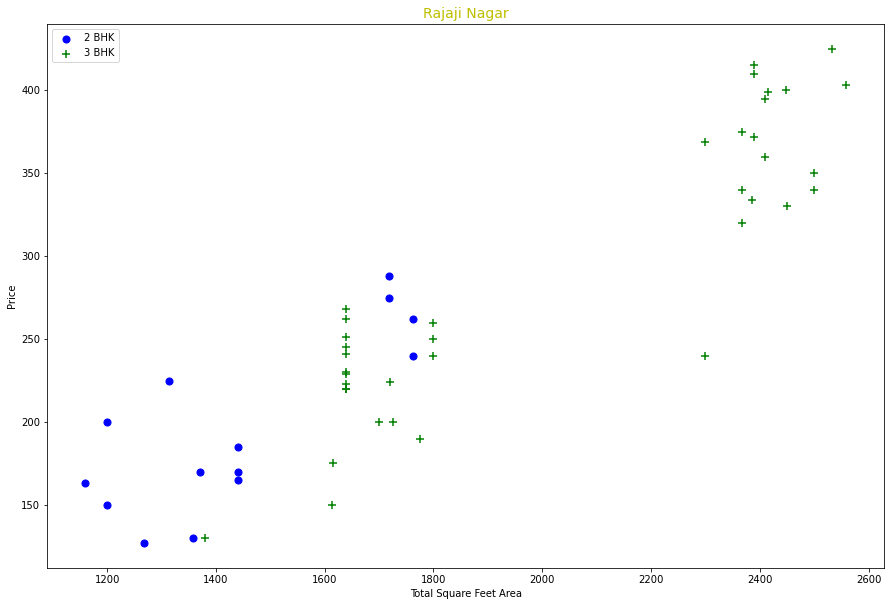

In [37]:
plot_scatter_chart(df7, "Rajaji Nagar")

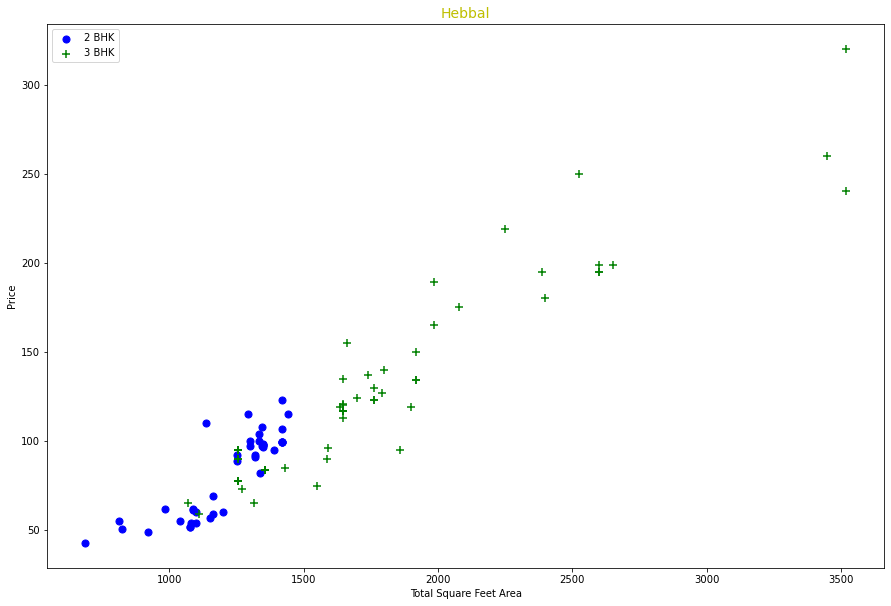

In [38]:
plot_scatter_chart(df7, "Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).  What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

{  
        '1' : {  
              'mean' : 4000,  
              'std' : 2000,   
              'count' : 34    
              },  
          '2' : {  
              'mean': 4300,  
              'std' : 2300,  
              'count' : 22  
          },  
}  

Now we can remove those a 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):        # in this 'for loop' we are finding the mean, std and count for the bhk Dataframe
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):     # in this 'for loop' we are removing that values of price_per_sqft that are making difference in the analysis
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

In [40]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

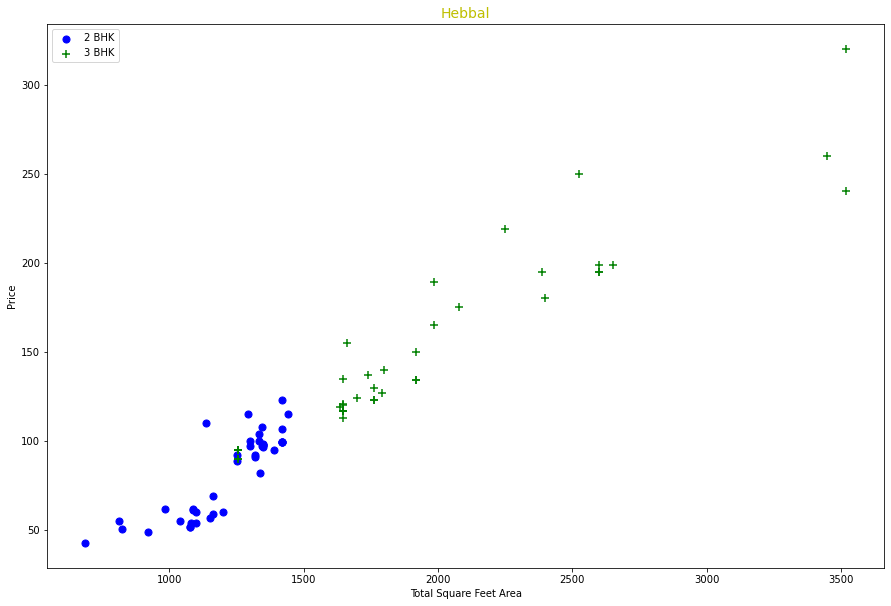

In [41]:
plot_scatter_chart(df8, 'Hebbal')

### 5. Data Visualization

Text(0, 0.5, 'Count')

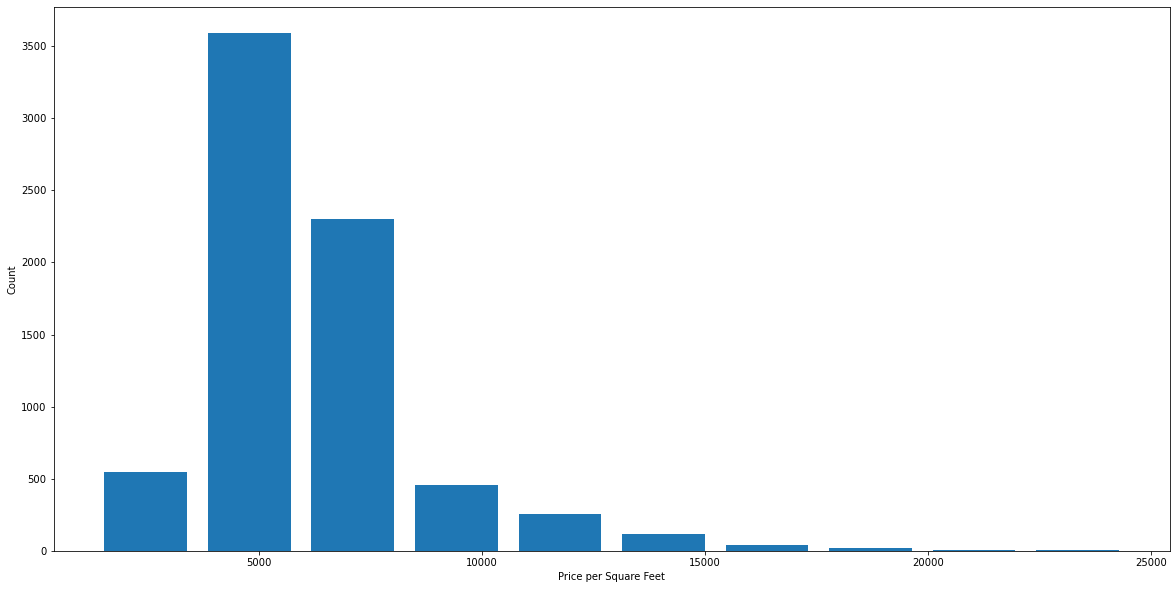

In [42]:
# visualization the price_per_sqft column

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

In [43]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [44]:
df8[df8.bath >= 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

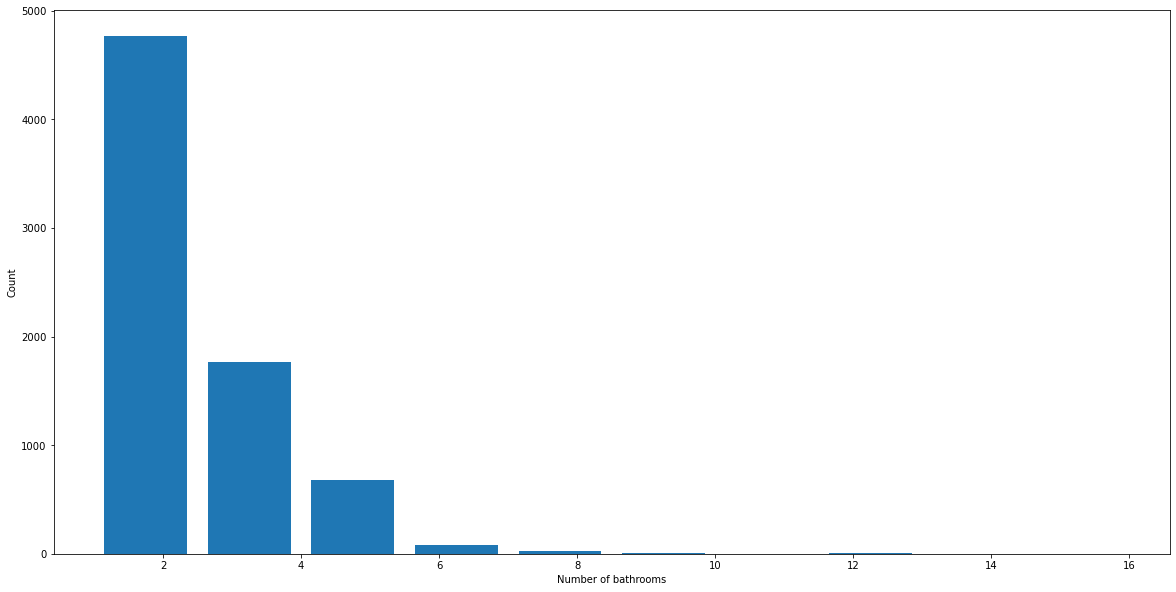

In [45]:
plt.hist(df8.bath,rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [46]:
df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [47]:
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape

(7251, 7)

Now we can start with model training so we need to drop some of the columns such as BHK and price_per_sqft as they needed only for the outlier detection and removal...

In [48]:
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### 6. Creating Dummies
We will use pandas' get_dummies() to create dummies variables. It is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [49]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To avoid getting trapped in the dummy variable trap , we should have one less dummy column, so lets say we are dropping the 1st Block Jaynagar, so to represent the dropped one we use 0s for the next all the columns....

In [50]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis = 'columns')  # joining the dummy values again with the dataset except 'other' column
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12 = df11.drop('location',axis='columns')    # dropping original location as now we have dummmies in its place.
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12.shape

(7251, 245)

### 7. Splitting Data for Training and Testing
Before Training the model, it is required to split the data into train and test data. For this we will use, sklearn's train_test_split

In [53]:
X = df12.drop('price',axis='columns')   # dropping price column as we don't want it in our train dataset
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X.shape

(7251, 244)

In [55]:
Y = df12.price    # taking the price column as our target to predict
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [56]:
Y.shape

(7251,)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, test_size = 0.2, random_state = 10)

# splitting the the data into train and test data as 80 : 20 ratio

In [58]:
X_train.shape

(5800, 244)

### 8. Training the Models
Preciesly, we will be trying more than one model, therefore, Training the Models

***`LinearRegression`***

In [59]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.8452277697874312

***`K-fold cross validation`***

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits =5, test_size = 0.2, random_state = 0)   # ShuffleSplit is just a another type of splitting data

cross_val_score(LinearRegression(), X,Y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

Cross Validation is mainly used for the comparison of different models. For each model, you may get the average generalization error on the k validation sets. Then you will be able to choose the model with the lowest average generation error as your optimal model.

In [61]:
'''
    Function to try different models at once of the data with different parameters to find the best ones.
'''

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']         
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores =[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv , return_train_score=False)   # GridSearchCV is the main focus as it helps to try out the different parameters for the different models.
        gs.fit(X,Y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])   # At last binding the results of the models with best params. into a DataFrame.

In the above code, the ```cv``` is the cross validation and it is counted from the ShuffleSplits  = 5 



In [62]:
find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687430,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.724832,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


As we can see the LinearRegression model performed the best, so we are going to use as it for prediction.

### 9. Prediction Time
Predicting the prices using LinearRegression in Lakhs.

In [63]:
# Function which helps to actually predict the prices.
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]  # np.where() function returns the indices of elements in an input array where the given condition is satisfied.

    x = np.zeros(len(X.columns))    # np.zeros() function returns a new array of given shape and type, with zeros.
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [64]:
predict_price('1st Phase JP Nagar', 1000, 2,3)

81.7261690075476

In [65]:
predict_price('Indira Nagar', 1000, 3,3)

184.5843020203347

In [66]:
print(predict_price('1st Phase JP Nagar', 1000, 2, 3).round(3),'Lakhs')

81.726 Lakhs


### 10. Saving Model
For saving the model, we will be using pickle module and json module for saving the locations' names.

In [67]:
import pickle
with open('banglore_house_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [68]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))